In [175]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score



In [176]:
data_all=pd.read_csv('./21265_transaction_price_data/train.csv',encoding='utf-8')
d_test=pd.read_csv('./21265_transaction_price_data/test.csv',encoding='utf-8')
d_park=pd.read_csv('./21265_transaction_price_data/park.csv',encoding='utf-8')
d_care=pd.read_csv('./21265_transaction_price_data/day_care_center.csv',encoding='utf-8')
d_mission=pd.read_csv('./21265_transaction_price_data/submission.csv',encoding='utf-8')

---
 1. 데이터 확인

In [177]:
data_all.head(3)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500


In [178]:
#컬럼 선택하기
data1=data_all.iloc[:,[2,3,7,8,9,10,11,12]]

#거래년도만 선택
data1['transaction_year_month']=data1['transaction_year_month'].apply(lambda x : x//100)
data1.head()

C:\Users\user\AppData\Local\Temp\ipykernel_19940\2354678949.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['transaction_year_month']=data1['transaction_year_month'].apply(lambda x : x//100)


,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,서울특별시,신교동,84.82,2002,2008,21~31,2,37500
1,서울특별시,필운동,99.17,1973,2008,1~10,6,20000
2,서울특별시,필운동,84.74,2007,2008,1~10,6,38500
3,서울특별시,내수동,146.39,2003,2008,11~20,15,118000
4,서울특별시,내수동,194.43,2004,2008,21~31,3,120000


In [5]:
#년식 컬럼 추가하기
data1['old']=data1.transaction_year_month - data1.year_of_completion

C:\Users\user\AppData\Local\Temp\ipykernel_19940\2799124368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['old']=data1.transaction_year_month - data1.year_of_completion


In [6]:
data1.head()

,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,old
0,서울특별시,신교동,84.82,2002,2008,21~31,2,37500,6
1,서울특별시,필운동,99.17,1973,2008,1~10,6,20000,35
2,서울특별시,필운동,84.74,2007,2008,1~10,6,38500,1
3,서울특별시,내수동,146.39,2003,2008,11~20,15,118000,5
4,서울특별시,내수동,194.43,2004,2008,21~31,3,120000,4


In [7]:
# 서울/부산 데이터셋 나누기
data_se=data1[data1.city=='서울특별시']
data_bu=data1[data1.city=='부산광역시']
data_bu

,city,dong,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,old
650921,부산광역시,영주동,57.0900,1998,2008,1~10,4,7900,10
650922,부산광역시,영주동,84.9700,2005,2008,1~10,12,13000,3
650923,부산광역시,영주동,84.8600,1997,2008,11~20,7,12400,11
650924,부산광역시,영주동,84.7200,1998,2008,11~20,14,10600,10
650925,부산광역시,영주동,84.5900,1997,2008,21~31,5,10000,11
...,...,...,...,...,...,...,...,...,...
1216548,부산광역시,정관읍 용수리,59.8245,2012,2017,11~20,3,22000,5
1216549,부산광역시,정관읍 용수리,84.9923,2012,2017,21~30,7,30750,5
1216550,부산광역시,정관읍 용수리,84.9923,2012,2017,21~30,9,29500,5
1216551,부산광역시,정관읍 용수리,101.7400,2008,2017,21~30,7,26700,9


---
 2. 데이터 분포 확인


<AxesSubplot: xlabel='transaction_real_price', ylabel='Count'>

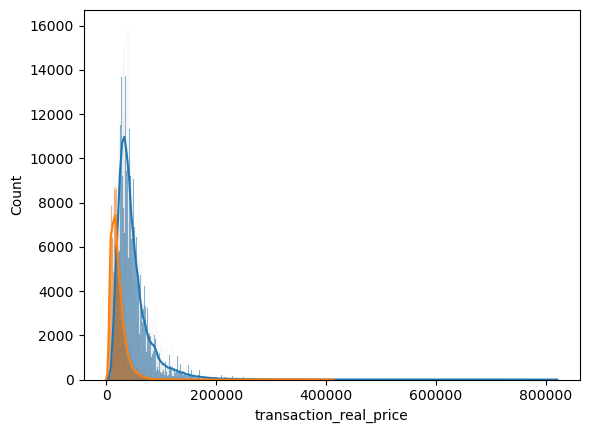

In [8]:
#서울/부산의 아파트 가격 분포 확인
sns.histplot(data_se.transaction_real_price,kde=True)
sns.histplot(data_bu.transaction_real_price,kde=True)

#서울/부산 가격대 범위가 다름 >> 다른 모델 사용해보자

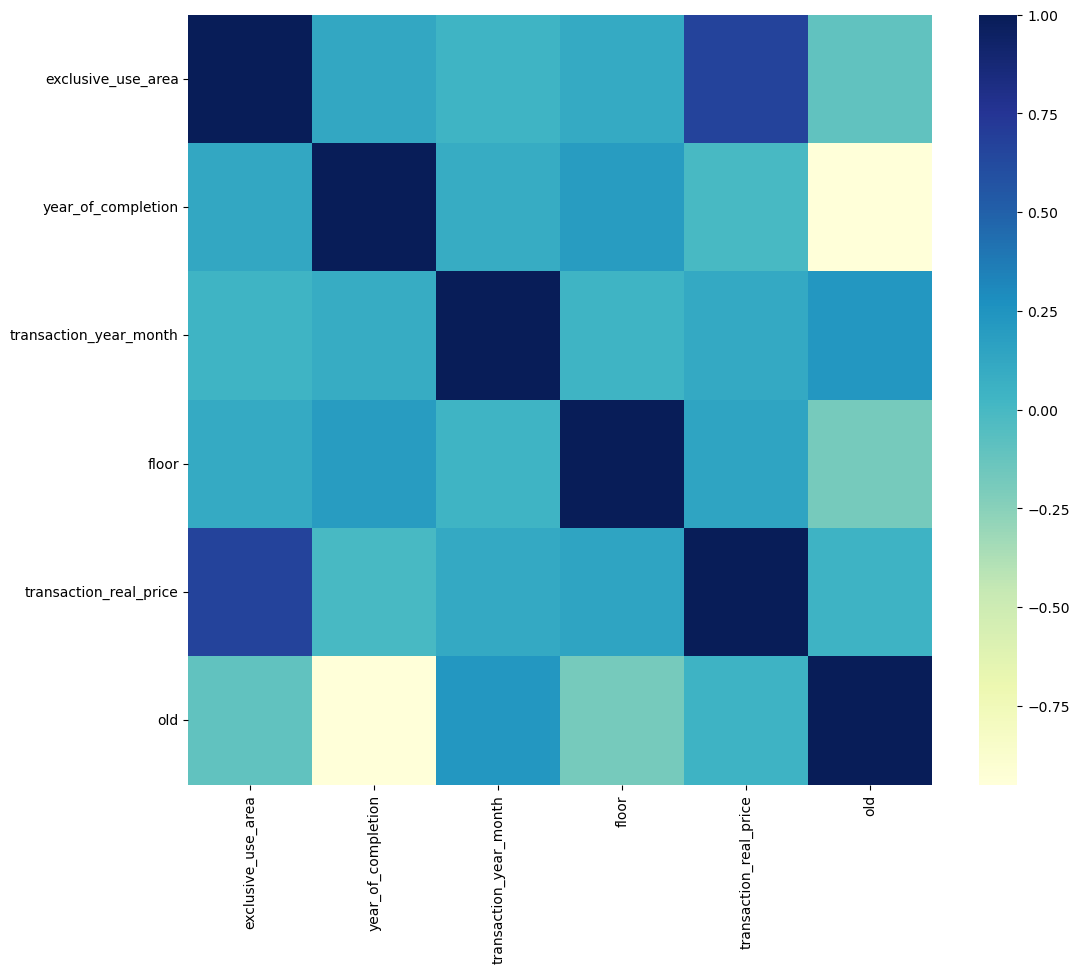

In [17]:
#서울 예측에 필요한 특성(컬럼) 찾아내기 > 상관계수가 높은 컬럼을 선택해보자

plt.figure(figsize=(12, 10))
sns.heatmap(data_se.corr(), cmap='YlGnBu')
plt.show()

# 서울 : 면적, 층수 사용하기로 결정

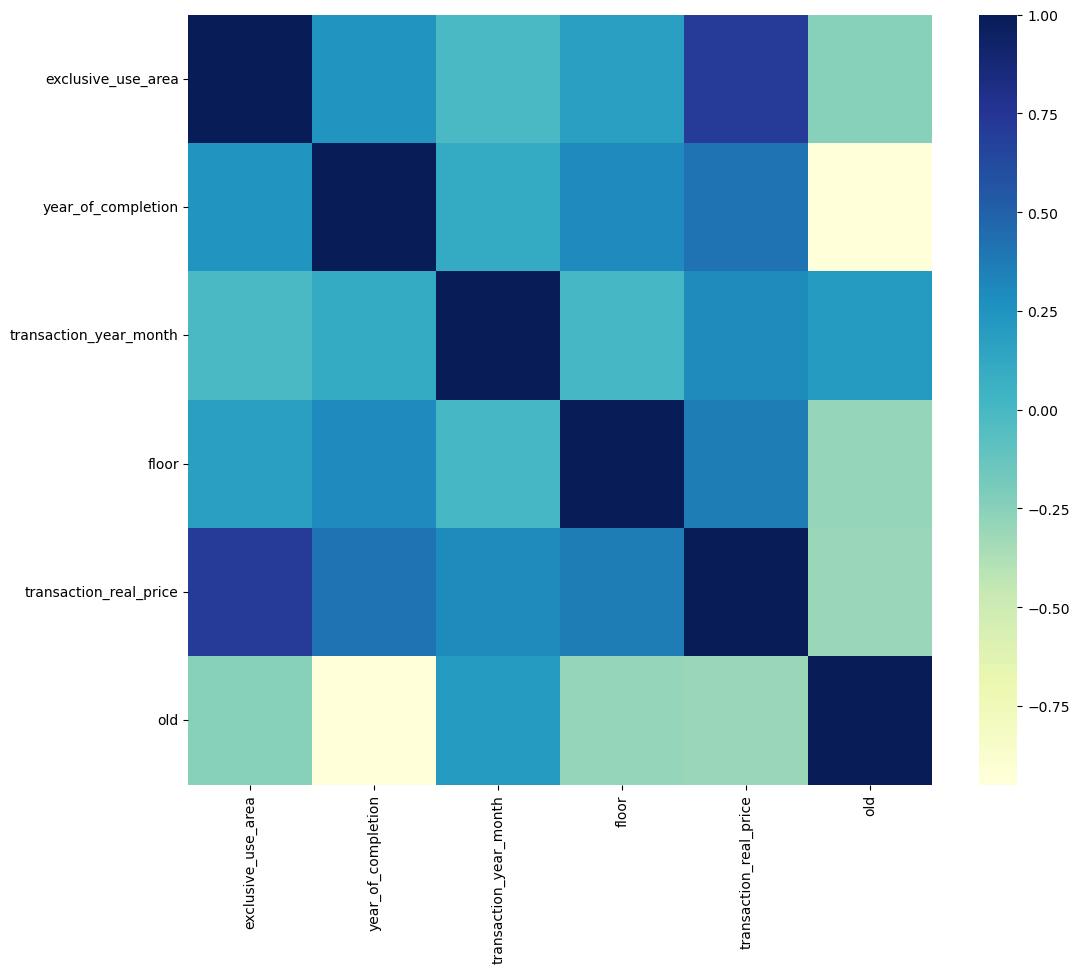

In [16]:
#부산 예측에 필요한 특성(컬럼) 찾아내기 > 상관계수가 높은 컬럼을 선택해보자

plt.figure(figsize=(12, 10))
sns.heatmap(data_bu.corr(), cmap='YlGnBu')
plt.show()

#부산: 면적, 건축년도, 층 사용하기로 결정

---
3. 데이터 정리   
        data1 : 전체 데이터   
        data_se : 서울데이터    / 서울 : 면적, 층   
        data_bu: 부산 데이터    / 부산: 면적, 건축년도, 층    


In [32]:
#정말 해당 특성들(컬럼)을 선택해도 될까? 한번더 OLS확인 : R^2 값만 확인했음

data_se.head()
data_se1=data_se[['dong','exclusive_use_area','floor','transaction_real_price']]
data_se1.head()

X = data_se1['exclusive_use_area']
X2 =data_se1['floor']
y = data_se1['transaction_real_price']
lm = sm.OLS(y, X).fit()
lm2=sm.OLS(y, X2).fit()

lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     transaction_real_price   R-squared (uncentered):                   0.817
Model:                                OLS   Adj. R-squared (uncentered):              0.817
Method:                     Least Squares   F-statistic:                          3.314e+06
Date:                    Tue, 21 Feb 2023   Prob (F-statistic):                        0.00
Time:                            19:09:02   Log-Likelihood:                     -8.5860e+06
No. Observations:                  742285   AIC:                                  1.717e+07
Df Residuals:                      742284   BIC:                                  1.717e+07
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
exclusive_use_area   650.0344      0.357   1820.552      0.000     649.335     650.734
==============================================================================
Omnibus:                   553003.582   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20882685.268
Skew:                           3.209   Prob(JB):                         0.00
Kurtosis:                      28.179   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     transaction_real_price   R-squared (uncentered):                   0.531
Model:                                OLS   Adj. R-squared (uncentered):              0.531
Method:                     Least Squares   F-statistic:                          8.395e+05
Date:                    Tue, 21 Feb 2023   Prob (F-statistic):                        0.00
Time:                            19:09:12   Log-Likelihood:                     -8.9355e+06
No. Observations:                  742285   AIC:                                  1.787e+07
Df Residuals:                      742284   BIC:                                  1.787e+07
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
floor       4098.1732      4.473    916.259      0.000    4089.407    4106.940
==============================================================================
Omnibus:                   351480.643   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5153900.437
Skew:                           1.910   Prob(JB):                         0.00
Kurtosis:                      15.331   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,exclusive_use_area,floor,transaction_real_price
0,84.82,2,37500
1,99.17,6,20000
2,84.74,6,38500
3,146.39,15,118000
4,194.43,3,120000
...,...,...,...
1184014,59.72,9,53000
1184015,59.87,12,53000
1184016,84.74,3,56500
1184017,84.74,9,55500


In [70]:
#서울 데이터의 특성 컬럼들만 (가격 제외) 정규화 진행
data_se1
data_se2=data_se1.copy()
#정규화
scaler=StandardScaler()

data_se2[['exclusive_use_area','floor']]=scaler.fit_transform(data_se2[['exclusive_use_area','floor']]) #데이터만

data_se2

,dong,exclusive_use_area,floor,transaction_real_price
0,신교동,0.240950,-1.149987,37500
1,필운동,0.741095,-0.474393,20000
2,필운동,0.238161,-0.474393,38500
3,내수동,2.386869,1.045694,118000
4,내수동,4.061223,-0.981089,120000
...,...,...,...,...
1184014,강일동,-0.633869,0.032303,53000
1184015,강일동,-0.628641,0.538998,53000
1184016,강일동,0.238161,-0.981089,56500
1184017,강일동,0.238161,0.032303,55500


In [73]:
#서울 데이터셋의 train/test 분리하기
Target=se_data.transaction_real_price   
Data=se_data.drop(columns='transaction_real_price',axis=1)

X_train, X_test, y_train, y_test=train_test_split(Data, Target, test_size=0.3,random_state=156)

#데이터셋 준비 끝. 부산도 동일하게 진행


---
 4. 회귀모델 학습과 평가

In [53]:
#예측 모델의 평가 점수를 확인해 보고 싶어서 평가하는 과정 추가 - RMSE
def get_rmse(model):
    pred=model.predict(X_test)
    mse=mean_squared_error(y_test,pred)
    rmse=np.sqrt(mse)
    print(f'rmse : {rmse}')
    return rmse

def get_rmses(models):
    rmses=[]
    for model in models:
        rmse=get_rmse(model)
        rmses.append(rmse)
    return rmses

In [74]:
# 어떤 모델이 좋은 성능을 나타낼지 몰라서 선형, 릿지, 라쏘로 진행해봄
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)

print('LinearRegression','Ridge','Lasso')
models=[lr_reg,ridge_reg,lasso_reg]
get_rmses(models)

LinearRegression Ridge Lasso
rmse : 237653972363.56934
rmse : 16263.147976514068
rmse : 16290.495954554577


[237653972363.56934, 16263.147976514068, 16290.495954554577]

In [ ]:
#서울모델은 릿지회귀 사용이 가장 점수가 좋음 (오차가 작음)

In [ ]:
# 릿지 파라미터 수정 해보자

In [75]:
alphas=[0,1,5,10,15]
for i in alphas:
    ridge=Ridge(alpha=i)

    #cross_val_score를 이용해 폴드의 평균 rmse를 구함
    mse_scores=cross_val_score(ridge, Data, Target, scoring="neg_mean_squared_error",cv=5)
    avg_rmse=np.mean(np.sqrt(-1*mse_scores))
    print('알파 {0}일 때 평균 RMSE :{1:.3F}'.format(i,avg_rmse))

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.89576e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


알파 0일 때 평균 RMSE :16345397683922944.000
알파 1일 때 평균 RMSE :20577.239
알파 5일 때 평균 RMSE :20509.167
알파 10일 때 평균 RMSE :20431.142
알파 15일 때 평균 RMSE :20358.428


In [76]:
alphas=[0.5,0.1,0.05,0.01]

for i in alphas:
    ridge=Ridge(alpha=i)

    #cross_val_score를 이용해 폴드의 평균 rmse를 구함
    mse_scores=cross_val_score(ridge, Data, Target, scoring="neg_mean_squared_error",cv=5)
    avg_rmse=np.mean(np.sqrt(-1*mse_scores))
    print('알파 {0}일 때 평균 RMSE :{1:.3F}'.format(i,avg_rmse))

알파 0.5일 때 평균 RMSE :20586.455
알파 0.1일 때 평균 RMSE :20594.179
알파 0.05일 때 평균 RMSE :20595.185
알파 0.01일 때 평균 RMSE :20595.999


In [78]:
alphas=[100,500,700]

for i in alphas:
    ridge=Ridge(alpha=i)

    #cross_val_score를 이용해 폴드의 평균 rmse를 구함
    mse_scores=cross_val_score(ridge, Data, Target, scoring="neg_mean_squared_error",cv=5)
    avg_rmse=np.mean(np.sqrt(-1*mse_scores))
    print('알파 {0}일 때 평균 RMSE :{1:.3F}'.format(i,avg_rmse))

알파 100일 때 평균 RMSE :19525.367
알파 500일 때 평균 RMSE :18716.431
알파 700일 때 평균 RMSE :18859.513


In [83]:
ridge_reg1=Ridge()
ridge_reg1.fit(X_train,y_train)
ridge_reg2=Ridge(alpha=520)
ridge_reg2.fit(X_train,y_train)
ridge_reg3=Ridge(515)
ridge_reg3.fit(X_train,y_train)

print('LinearRegression','Ridge','Lasso')
models=[ridge_reg1,ridge_reg2,ridge_reg3]
get_rmses(models)

LinearRegression Ridge Lasso
rmse : 16263.147976514068
rmse : 16623.890383139995
rmse : 16620.11185534101


[16263.147976514068, 16623.890383139995, 16620.11185534101]

In [ ]:
ridge_reg1.predict()

In [ ]:
# 하이퍼파라미터 수정 안하는게 더 나은듯... >> 그냥 디폴트값으로 진행결정

---
 5. test 데이터셋 수정하기 : 위와 동일하게 , 서울과 부산으로 분리하여 다른 컬럼 선택
 

In [85]:
d_test=pd.read_csv('./21265_transaction_price_data/test.csv',encoding='utf-8')

d_test.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


In [142]:
testdata_se=d_test[d_test.city=='서울특별시']

In [144]:
testdata_se=testdata_se[['transaction_id','exclusive_use_area','floor']]
testdata_se.head(2)

#정규화
scaler=StandardScaler()


#데이터/타겟값 따로 스케일 적용
testdata_se[['exclusive_use_area','floor']]=scaler.fit_transform(testdata_se[['exclusive_use_area','floor']]) #데이터만

testdata_se

,transaction_id,exclusive_use_area,floor
0,1145756,-1.354626,-1.065655
3,1179897,0.855389,0.299934
6,1151450,0.080909,0.812030
7,1197195,0.587826,0.129235
8,1146078,0.696014,-0.724258
...,...,...,...
5457,1131346,-0.303858,-0.041463
5458,1174640,0.055898,-0.212162
5459,1175575,0.081491,-0.724258
5460,1157024,0.816069,2.519016


In [98]:
len(test_se_data.columns)

271

In [145]:
ridge_re=Ridge()
ridge_re.fit(se_data[['exclusive_use_area','floor']],se_data.transaction_real_price)    #fit에는 데이터, 타겟이 모두 있는 데이터 입력
result=ridge_re.predict(testdata_se[['exclusive_use_area','floor']])                    #predict에는 타겟이 없는 test.csv 로 수정한 데이터 입력

In [146]:
re1=result.tolist()

In [149]:
end_s=pd.DataFrame({'transaction_id':testdata_se.iloc[:,0].tolist(),
                   'transaction_real_price':re1})

In [150]:
end_s

,transaction_id,transaction_real_price
0,1145756,16192.624215
1,1179897,69066.615071
2,1151450,52999.129658
3,1197195,62651.896054
4,1146078,62953.275397
...,...,...
3906,1131346,42263.585900
3907,1174640,49894.084068
3908,1175575,49194.562409
3909,1157024,73700.562715


---

##  ~ 끝 ~
아래 부산 데이터는 정리 안함   
위와 동일한 전처리 진행했습니다 

▼ 부산

---
# 

In [30]:
#부산 - 면적, 건축년도, 층   exclusive_use_area   year_of_completion   floor
data_bu.head()
data_bu1=data_bu[['dong','exclusive_use_area','year_of_completion','floor','transaction_real_price']]
data_bu1.head()

X1 = data_bu1['exclusive_use_area']
X2 = data_bu1['year_of_completion']
X3 =data_bu1['floor']
y = data_bu1['transaction_real_price']

# for i in [X1,X2,X3]:
#     globals() ['lm_{}'.format(i)]=sm.OLS(y, i).fit()

lm1 = sm.OLS(y, X1).fit()
lm2=sm.OLS(y, X2).fit()
lm3 = sm.OLS(y, X3).fit()


In [17]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     transaction_real_price   R-squared (uncentered):                   0.843
Model:                                OLS   Adj. R-squared (uncentered):              0.843
Method:                     Least Squares   F-statistic:                          2.554e+06
Date:                    Tue, 21 Feb 2023   Prob (F-statistic):                        0.00
Time:                            19:01:40   Log-Likelihood:                     -5.0425e+06
No. Observations:                  474268   AIC:                                  1.008e+07
Df Residuals:                      474267   BIC:                                  1.008e+07
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
exclusive_use_area   276.8963      0.173   1598.259      0.000     276.557     277.236
==============================================================================
Omnibus:                   493558.954   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        140649488.341
Skew:                           4.685   Prob(JB):                         0.00
Kurtosis:                      86.843   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     transaction_real_price   R-squared (uncentered):                   0.695
Model:                                OLS   Adj. R-squared (uncentered):              0.695
Method:                     Least Squares   F-statistic:                          1.081e+06
Date:                    Tue, 21 Feb 2023   Prob (F-statistic):                        0.00
Time:                            19:01:40   Log-Likelihood:                     -5.2005e+06
No. Observations:                  474268   AIC:                                  1.040e+07
Df Residuals:                      474267   BIC:                                  1.040e+07
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
year_of_completion    10.5705      0.010   1039.655      0.000      10.551      10.590
==============================================================================
Omnibus:                   401991.655   Durbin-Watson:                   1.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         35609052.565
Skew:                           3.607   Prob(JB):                         0.00
Kurtosis:                      44.832   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     transaction_real_price   R-squared (uncentered):                   0.623
Model:                                OLS   Adj. R-squared (uncentered):              0.623
Method:                     Least Squares   F-statistic:                          7.845e+05
Date:                    Tue, 21 Feb 2023   Prob (F-statistic):                        0.00
Time:                            19:01:41   Log-Likelihood:                     -5.2507e+06
No. Observations:                  474268   AIC:                                  1.050e+07
Df Residuals:                      474267   BIC:                                  1.050e+07
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
floor       1583.7223      1.788    885.728      0.000    1580.218    1587.227
==============================================================================
Omnibus:                   138597.600   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1444675.371
Skew:                           1.107   Prob(JB):                         0.00
Kurtosis:                      11.259   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
data_bu1

,dong,exclusive_use_area,year_of_completion,floor,transaction_real_price
650921,영주동,57.0900,1998,4,7900
650922,영주동,84.9700,2005,12,13000
650923,영주동,84.8600,1997,7,12400
650924,영주동,84.7200,1998,14,10600
650925,영주동,84.5900,1997,5,10000
...,...,...,...,...,...
1216548,정관읍 용수리,59.8245,2012,3,22000
1216549,정관읍 용수리,84.9923,2012,7,30750
1216550,정관읍 용수리,84.9923,2012,9,29500
1216551,정관읍 용수리,101.7400,2008,7,26700


In [154]:
data_bu1.columns

Index(['dong', 'exclusive_use_area', 'year_of_completion', 'floor',
       'transaction_real_price'],
      dtype='object')

In [151]:
testdata_bu=data_bu1[['transaction_id','exclusive_use_area','year_of_completion','floor','transaction_real_price']]
testdata_bu.head(2)

#동제외 정규화

# #정규화
scaler=StandardScaler()


# #데이터/타겟값 따로 스케일 적용
testdata_bu[['exclusive_use_area','year_of_completion','floor']]=scaler.fit_transform(testdata_bu[['exclusive_use_area','year_of_completion','floor']]) #데이터만

testdata_bu.head(2)
# #동이름 추가
# dong_list=testdata_se.dong.tolist()
# testdata_se['dong']=dong_list


# #원핫인코딩
# test_se_data=pd.get_dummies(testdata_se)
# test_se_data 


#동제거 데이터 사용하기
# testdata_bu.drop(columns='dong',axis=1,inplace=True)


KeyError: "['transaction_id'] not in index"

In [121]:
d_test.head(2)
test_bu2=d_test[d_test.city=='부산광역시']
test_bu2.head(2)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.72,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.54,1989,201710,11~20,2


In [155]:
bu=test_bu2[['transaction_id','exclusive_use_area','year_of_completion','floor']]
bu.head(2)

scaler=StandardScaler()

bu[['exclusive_use_area','year_of_completion','floor']]=scaler.fit_transform(bu[['exclusive_use_area','year_of_completion','floor']]) #데이터만
bu.head(2)

C:\Users\user\AppData\Local\Temp\ipykernel_19940\962652301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bu[['exclusive_use_area','year_of_completion','floor']]=scaler.fit_transform(bu[['exclusive_use_area','year_of_completion','floor']]) #데이터만


,transaction_id,exclusive_use_area,year_of_completion,floor
1,1198704,-0.148575,-1.960592,-0.956997
2,1222384,-0.011512,-0.930082,-0.956997


In [156]:
testdata_bu.head()

,exclusive_use_area,year_of_completion,floor,transaction_real_price
650921,-0.719576,-0.076079,-0.826236,7900
650922,0.214380,0.715562,0.243339,13000
650923,0.210695,-0.189171,-0.425145,12400
650924,0.206005,-0.076079,0.510733,10600
650925,0.201650,-0.189171,-0.692539,10000


In [157]:
ridge_re4=Ridge()
ridge_re4.fit(testdata_bu[['exclusive_use_area','year_of_completion','floor']],testdata_bu.transaction_real_price)
result2=ridge_re4.predict(bu[['exclusive_use_area','year_of_completion','floor']])

In [158]:
re2=result2.tolist()
re2

[11849.321848677926,
 15862.206608613957,
 44498.93978006982,
 11080.22670143402,
 28095.026307436587,
 19389.870420877145,
 21583.636155408505,
 25542.637261238706,
 8043.738022284457,
 17206.712501500682,
 21950.594265961037,
 18590.711612467,
 12139.855125680766,
 23826.153044805764,
 24302.411099353838,
 19184.690294036936,
 21274.592106500477,
 11509.963285632177,
 19989.535763279066,
 15330.448698048298,
 23109.577542844025,
 25835.644760127318,
 27228.462930256348,
 15619.26926851949,
 26060.953105792534,
 19377.40048881596,
 19716.845891926623,
 13449.13244507406,
 33113.76931936386,
 11069.163041500437,
 19727.648773655816,
 11651.20832127329,
 65751.30109145129,
 22420.371914229145,
 24990.418225841753,
 21672.49868267069,
 11272.661314278124,
 26505.23642372586,
 29128.00595365395,
 16814.897803870193,
 26639.77818481082,
 20628.043138861045,
 28626.829393022443,
 28258.567349384433,
 7586.542576786875,
 39023.568941416626,
 35731.36729756475,
 5820.0063011985785,
 -1930.280

In [161]:
end_b=pd.DataFrame({'transaction_id':bu.iloc[:,0].tolist(),
                   'transaction_real_price':re2})

In [164]:
end_b

,transaction_id,transaction_real_price
0,1198704,11849.321849
1,1222384,15862.206609
2,1223091,44498.939780
3,1202911,11080.226701
4,1233184,28095.026307
...,...,...
1547,1222933,17546.773749
1548,1223011,14087.122560
1549,1230561,22858.046324
1550,1233331,29534.692555


In [165]:
end_s

,transaction_id,transaction_real_price
0,1145756,16192.624215
1,1179897,69066.615071
2,1151450,52999.129658
3,1197195,62651.896054
4,1146078,62953.275397
...,...,...
3906,1131346,42263.585900
3907,1174640,49894.084068
3908,1175575,49194.562409
3909,1157024,73700.562715


In [168]:
result = pd.concat([end_s,end_b])
result

,transaction_id,transaction_real_price
0,1145756,16192.624215
1,1179897,69066.615071
2,1151450,52999.129658
3,1197195,62651.896054
4,1146078,62953.275397
...,...,...
1547,1222933,17546.773749
1548,1223011,14087.122560
1549,1230561,22858.046324
1550,1233331,29534.692555


In [169]:
d_mission

,transaction_id,transaction_real_price
0,1145756,0
1,1198704,0
2,1222384,0
3,1179897,0
4,1223091,0
...,...,...
5458,1174640,0
5459,1175575,0
5460,1157024,0
5461,1136863,0


In [173]:
for i in range(5463):
    d_mission.transaction_id[i]=result.transaction_real_price[result.transaction_id[i]]

KeyError: "None of [Int64Index([1145756, 1198704], dtype='int64')] are in the [index]"

In [182]:
result.to_csv('./result.csv',encoding='utf-8')

In [179]:
result

,transaction_id,transaction_real_price
0,1145756,16192.624215
1,1179897,69066.615071
2,1151450,52999.129658
3,1197195,62651.896054
4,1146078,62953.275397
...,...,...
1547,1222933,17546.773749
1548,1223011,14087.122560
1549,1230561,22858.046324
1550,1233331,29534.692555


In [181]:
end_b.to_csv('./end_b.csv',encoding='utf-8')